In [1101]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [1102]:
data = pd.read_csv("./data.csv")
print(data.head())

train_data = data[data["subject"] == 1]["shape_num"].to_numpy()

print(train_data.shape)

real_y = train_data[:24]
real_y_add = train_data[24:24*2]
print(real_y)
print(real_y_add)

def gen_data(d):
    data = np.empty((0, 24))
    for index in d:
        #print("item?: ", index)
        # Create an array of zeros with length 24
        result_array = np.zeros(24)
        result_array[d[index] - 1] = 1
        data = np.vstack((data, result_array))
    return data

X_train = gen_data(train_data)

print(X_train.shape)
print(X_train[:3])


"""
y train creation:

Hetzelfde maar dus elke keer item van de volgende in de lijst en elke na 3de element is [0,...,0]
"""

y_train = X_train.copy()
y_train[:-1] = X_train[1:]

print(y_train.shape, X_train.shape)
print(X_train[:4])
print("---")
print(y_train[:4])

y_train[2::3] = np.zeros((192, 24))

print(X_train[:4])
print("---")
print(y_train[:4])

X_test = X_train[:24]
y_test = y_train[:24]

#X_train = np.reshape(X_train, (24, -1, 24))
#X_test = np.reshape(X_test, (24, -1, 24))

#X_train = np.reshape(X_train, (-1, 24, 24))
#X_test = np.reshape(X_test, (-1, 24, 24))

X_train = np.reshape(X_train, (-1, 1, 24))
X_test = np.reshape(X_test, (-1, 1,  24))

#y_train = np.reshape(y_train, (24, -1, 24))
#y_test = np.reshape(y_test, (24, -1, 24))

y_train = np.reshape(y_train, (-1, 1, 24))
y_test = np.reshape(y_test, (-1, 1, 24))

#y_train = np.reshape(y_train, (-1, 24, 24))
#y_test = np.reshape(y_test, (-1, 24, 24))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

   subject         ave          sd  block  triplet  position  shape_num    RT  \
0        1  463.309028  298.476633      1        1         1          1  1121   
1        1  463.309028  298.476633      1        1         2          2   886   
2        1  463.309028  298.476633      1        1         3          3   837   
3        1  463.309028  298.476633      1        7         1         19   843   
4        1  463.309028  298.476633      1        7         2         20  1264   

    RT_trimmed  log_RT_trimmed  change?  block>12  block>18  block>6  \
0  1060.262293        6.966272        1     False     False    False   
1   886.000000        6.786717        0     False     False    False   
2   837.000000        6.729824        0     False     False    False   
3   843.000000        6.736967        0     False     False    False   
4  1060.262293        6.966272        1     False     False    False   

   1-avg(2,3)  log_1-avg(2,3) odd_even  
0         NaN             NaN        o 

In [1103]:
def build_network(learning_rate: float = 0.001):
      model = tf.keras.Sequential()
      model.add(tf.keras.Input(shape=(1,24)))
      model.add(tf.keras.layers.SimpleRNN(units=64, return_sequences = True, activation = "tanh"))
      #model.add(tf.keras.layers.GRU(units=64, return_sequences = True, activation = "tanh"))
      #model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=24, activation="softmax")))  # Output shape should match the number of features
      model.add(tf.keras.layers.Dense(units=24, activation = "softmax")) 
      loss = tf.keras.losses.CategoricalCrossentropy()
      model.compile(optimizer = \
         tf.keras.optimizers.Adam(learning_rate = learning_rate), loss = loss, metrics = ["accuracy"])	
      return model


In [1104]:
def train_model():
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    res = model.fit(X_train, y_train, epochs = 100, verbose=1)
    return res

In [1105]:
def show_res(res, verbose: bool = False):
    if verbose:
        print(res.history)
    fig, axs = plt.subplots(2,2)
    axs[0, 0].set_title("training loss")
    axs[0, 0].plot(res.history["loss"])
    axs[0, 1].set_title("training accuracy")
    axs[0, 1].plot(res.history["accuracy"])
    axs[1, 0].set_title("test loss")
    #axs[1, 0].plot(res.history["val_loss"])
    axs[1, 1].set_title("test accuracy")
    #axs[1, 1].plot(res.history["val_accuracy"])
    plt.show()

(576, 1, 24) (576, 1, 24) (24, 1, 24) (24, 1, 24)
Epoch 1/100
18/18 [==============================] - 0s 793us/step - loss: 2.0811 - accuracy: 0.0316
Epoch 2/100
18/18 [==============================] - 0s 672us/step - loss: 1.9034 - accuracy: 0.3081
Epoch 3/100
18/18 [==============================] - 0s 681us/step - loss: 1.7399 - accuracy: 0.5471
Epoch 4/100
18/18 [==============================] - 0s 666us/step - loss: 1.5840 - accuracy: 0.6416
Epoch 5/100
18/18 [==============================] - 0s 666us/step - loss: 1.4422 - accuracy: 0.6671
Epoch 6/100
18/18 [==============================] - 0s 638us/step - loss: 1.2470 - accuracy: 0.6582
Epoch 7/100
18/18 [==============================] - 0s 610us/step - loss: 1.0898 - accuracy: 0.6685
Epoch 8/100
18/18 [==============================] - 0s 585us/step - loss: 0.9177 - accuracy: 0.6628
Epoch 9/100
18/18 [==============================] - 0s 634us/step - loss: 0.7886 - accuracy: 0.6703
Epoch 10/100
18/18 [=====================

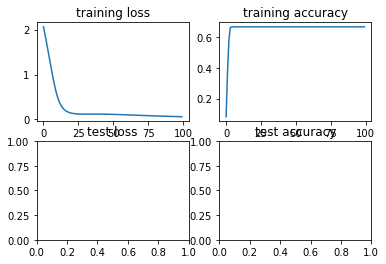

[[[2.92098220e-03 1.67552440e-03 9.17297363e-01 7.28731416e-03
   1.14625809e-03 4.77760611e-03 4.51283297e-03 1.39441004e-03
   1.26352720e-03 8.09585303e-03 1.25154422e-03 9.40009952e-03
   6.99649518e-03 3.02579952e-03 4.30811429e-03 3.53865186e-03
   2.85756588e-03 1.74063549e-03 5.21588186e-03 5.52032085e-04
   6.10110164e-03 1.26098492e-03 1.03207154e-03 2.34736176e-03]]

 [[9.66713356e-04 5.50753670e-04 2.92151957e-03 7.33445166e-03
   1.49479823e-03 1.15174279e-02 6.40396168e-03 9.63833940e-04
   4.43312014e-03 4.93766135e-03 5.86882874e-04 4.53984132e-03
   2.13723350e-03 7.76035595e-04 4.19533672e-03 4.84334026e-03
   1.28050148e-03 1.46353943e-03 9.24739420e-01 7.80530507e-04
   4.21661185e-03 6.96720369e-03 1.12702523e-03 8.22281349e-04]]

 [[9.67830513e-03 6.79225894e-03 5.72374053e-02 6.09772652e-02
   9.49625205e-03 6.27589971e-02 4.98019941e-02 6.98054768e-03
   6.31528571e-02 7.51327425e-02 8.12164508e-03 6.02397360e-02
   5.24183065e-02 1.00427521e-02 5.03913499e-02 7

In [1106]:
model = build_network()
res = train_model()
model.summary()

show_res(res)

print(model.predict(X_test))
print(model.predict(X_test).shape)

(24, 1, 24)
(24, 1, 24)
[[2.9209822e-03 1.6755244e-03 9.1729736e-01 7.2873142e-03 1.1462581e-03
  4.7776061e-03 4.5128330e-03 1.3944100e-03 1.2635272e-03 8.0958530e-03
  1.2515442e-03 9.4000995e-03 6.9964952e-03 3.0257995e-03 4.3081143e-03
  3.5386519e-03 2.8575659e-03 1.7406355e-03 5.2158819e-03 5.5203208e-04
  6.1011016e-03 1.2609849e-03 1.0320715e-03 2.3473618e-03]]
i 0
pred: i,  [2.9209822e-03 1.6755244e-03 9.1729736e-01 7.2873142e-03 1.1462581e-03
 4.7776061e-03 4.5128330e-03 1.3944100e-03 1.2635272e-03 8.0958530e-03
 1.2515442e-03 9.4000995e-03 6.9964952e-03 3.0257995e-03 4.3081143e-03
 3.5386519e-03 2.8575659e-03 1.7406355e-03 5.2158819e-03 5.5203208e-04
 6.1011016e-03 1.2609849e-03 1.0320715e-03 2.3473618e-03]
i 1
pred: i,  [9.6671336e-04 5.5075367e-04 2.9215196e-03 7.3344517e-03 1.4947982e-03
 1.1517428e-02 6.4039617e-03 9.6383394e-04 4.4331201e-03 4.9376613e-03
 5.8688287e-04 4.5398413e-03 2.1372335e-03 7.7603559e-04 4.1953367e-03
 4.8433403e-03 1.2805015e-03 1.4635394e-03 9.

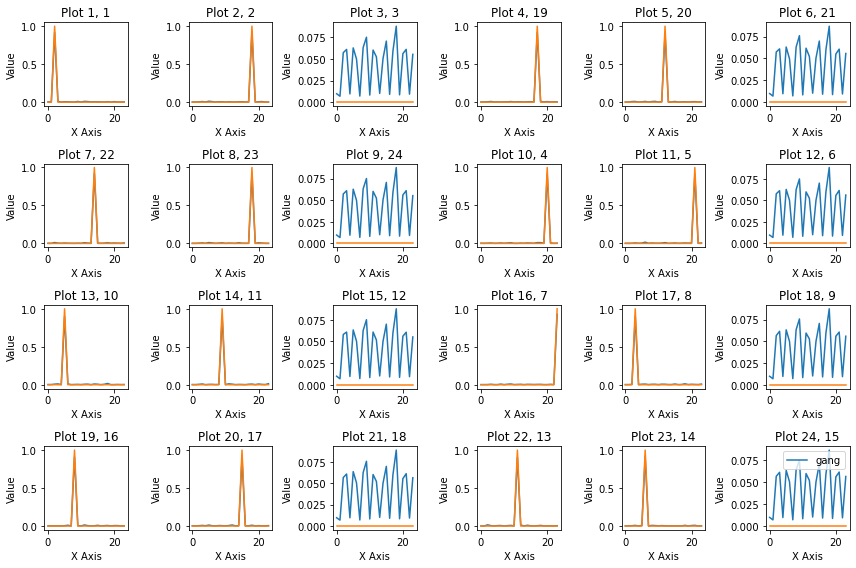

In [1107]:
pred = model.predict(X_test)
print(pred.shape)
print(y_test.shape)

print(pred[0])

# Create 24 subplots
fig, axes = plt.subplots(4, 6, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    print("i", i)
    #ax.plot(pred[i, 0, :])
    ax.plot(pred[i, 0, :], label="gang")
    print("pred: i, ", pred[i][0])
    ax.plot(y_test[i, 0, :])
    #ax.plot(y_test[i])
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Value')
    ax.set_title(f'Plot {i+1}, {real_y[i]}')

plt.tight_layout()
plt.legend()
plt.show()

In [1108]:
# Generate a random 3D array for demonstration
preds = model.predict(X_test)
print(preds.shape)

# Find the index of the maximum value
max_index = np.argmax(preds[0])
print(max_index)

# Create a new array with all zeros and set the maximum value to 1
new_array = np.zeros_like(np.arange(24))
new_array[max_index] = 1

# Print the result
print(new_array.shape)
print(preds[0])
print(new_array)
print(y_test[0])

(24, 1, 24)
2
(24,)
[[2.9209822e-03 1.6755244e-03 9.1729736e-01 7.2873142e-03 1.1462581e-03
  4.7776061e-03 4.5128330e-03 1.3944100e-03 1.2635272e-03 8.0958530e-03
  1.2515442e-03 9.4000995e-03 6.9964952e-03 3.0257995e-03 4.3081143e-03
  3.5386519e-03 2.8575659e-03 1.7406355e-03 5.2158819e-03 5.5203208e-04
  6.1011016e-03 1.2609849e-03 1.0320715e-03 2.3473618e-03]]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
